In [66]:
#Render plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# make pretty graphics easily
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
# set print options to good format for reading tabular data (MUCH STRINGS...)
pd.set_option("max_rows", 999)
pd.set_option('max_colwidth', 10000)

# read data for both request types and concatenate
glass = pd.read_csv("./Data/google_glass_request_form.csv", encoding="utf-8")
# start of conversion for d3.js --> glass["Type"] = pd.Series()
rift = pd.read_csv("./Data/oculus_rift_request_form.csv")
total = pd.concat([glass, rift])

# Total requests by affiliation
___

In [67]:
totalStatus = total["NCSU Status"].value_counts()
print(totalStatus)

Undergraduate Student    65
Masters Student          59
PhD Student              21
Staff                     8
Other                     6
Faculty                   5
Name: NCSU Status, dtype: int64


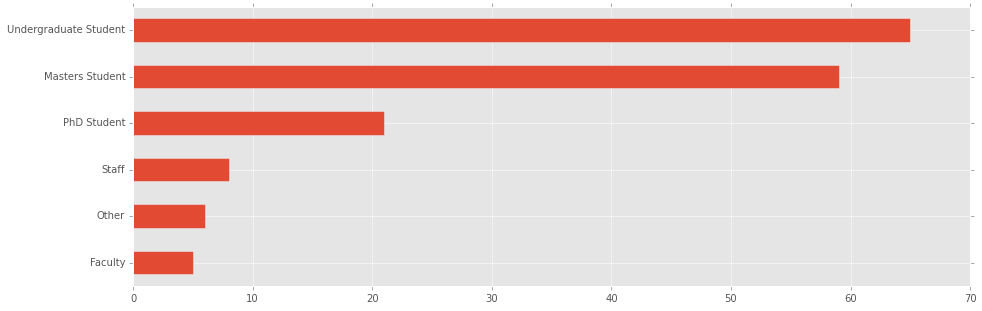

In [68]:
totalStatus.plot(kind="barh").invert_yaxis()
#uncomment below to export fiqure as svg
#plt.savefig("totalStatus.svg", format="svg")

# Google Glass requests by affiliation
___

In [69]:
glassStatus = glass["NCSU Status"].value_counts()
print(glassStatus)

Masters Student          47
Undergraduate Student    46
PhD Student              21
Staff                     6
Other                     5
Faculty                   5
Name: NCSU Status, dtype: int64


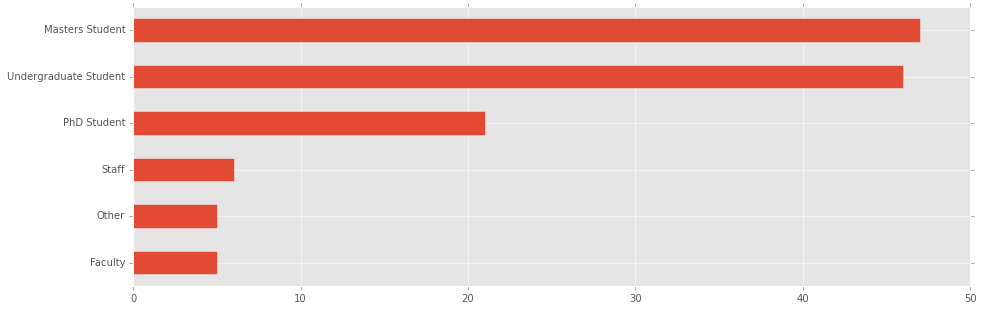

In [70]:
glassStatus.plot(kind="barh").invert_yaxis()

# Oculus Rift requests by affiliation
***

In [71]:
riftStatus = rift["NCSU Status"].value_counts()
print(riftStatus)

Undergraduate Student    19
Masters Student          12
Staff                     2
Other                     1
Name: NCSU Status, dtype: int64


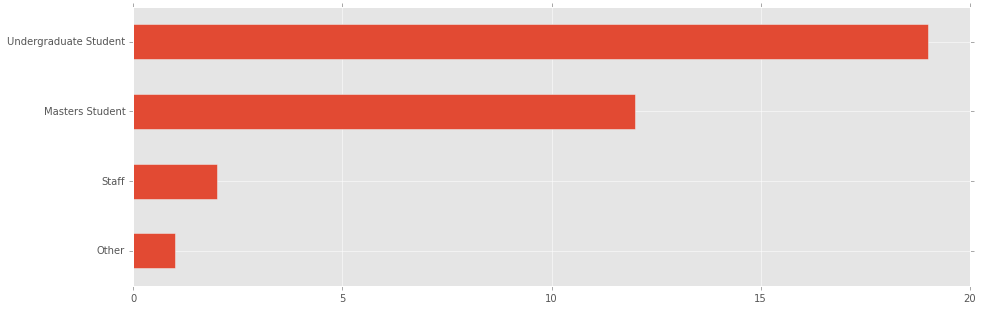

In [72]:
riftStatus.plot(kind="barh").invert_yaxis()

# Textual analyses
___

In [73]:
total

,NCSU Status,Use
0,Undergraduate Student,I am going to use Glass on a platform my brother and I are building called Citywix.com. It is currently a class project as well as a startup project for students within the Entrepreneurship Initiative program as well as the Entrepreneurship concentration within PCOM.
1,Undergraduate Student,"I am studying the possibilities of combining creative coding with big data to explore the possibilities of digital media experiences and distribution. My primary focus when I continue my studies in graduate school will be to develop a system utilizing this research. If wearables similar to google glass are predicted to be a popular medium in the future I'd like to begin the development stage with those technologies in mind. With that being the case, having an idea of what a google glass user experience is like will propel how I design this system for similar wearable devices."
2,Undergraduate Student,Learning about the possible ways to implement its use with a web server.
3,Masters Student,"Application Development: Specifically, building basic Facebook integration for Glass so as to quantify the implecations of wearable devices on social media."
4,Undergraduate Student,Research and development.
5,PhD Student,"I plan to use the Google Glasses for teaching and learning in the COM 110 public speaking course that I teach. I have two current students who are interested in helping to explore using the glasses within the context of the public speaking assignments. We would like to evaluate the glasses for use as a speaking aid, similar to notecards or a teleprompter. We plan to have each of the students give two versions of a speech, one with glasses, and one without glasses, to determine whether the glasses will improve their performance based on our standard rubric. We are particularly interested in determining whether the glasses will help improve physical and vocal delivery components such as eye contact and verbal pauses. Through this experience, we hope to develop a better understanding for how wearable technology such as Google Glasses might affect the future of public speaking. We are planning to write and produce a multi-modal exploration of this augmentation technology in the classroom, with the aim of publishing it in an online multi-modal journal such as Kairos."
6,Masters Student,I want to use Glass to get a feel of it and the development environment so that I can use this information as a reference point for a potential app.
7,PhD Student,"I am interested in exploring how Glass can enhance my dissertation work. I study fish biomechanics and have to do a great deal of filming and photography of live fish (creek chub and blacknose dace) in the field and in the lab, where hands-free voice commands would be a great advantage, not to mention the ability to have Glass assess changing lighting and motion conditions and take the best possible photo of a specimen using something like its Moment Camera app. As part of this project I also do water monitoring and hydrology, and I am interested in how Glass could be used for displaying live stream conditions and GIS data at field sites. For the pickup date requested (March 26th), I would only need two to three hours to try out Glass, and I would not need to remove it from the library. I hope this allows other library patrons to be accommodated as well. Apart from my immediate dissertation needs, I am very interested in assessing the applications Glass has for improving education. I am preparing for a university teaching career, so I am especially excited about the Glassentation app for use in giving talks and lectures. I would be interested in one day conducting pedagogy research to see whether this type of app increases student attention and learning by reducing the amount of time the instructor spends with his/her head down looking at lecture notes. The potential for Glass to help instructors keep track of student names (with face recognition software),

In [74]:
def getAllWords(wordList, ignoreList=None):
    '''
    This function takes in list of strings and, optionally, a text file of 
    words to ignore.
    This function returns a pandas Series of each individual word contained 
    in the list of strings.
    '''
    from string import punctuation
    
    # create empty list
    allWords = []

    # words to ignore if ignoreList included, blank Dataframe if not
    if ignoreList is not None:
        ignoreWords = pd.read_csv(ignoreList, delim_whitespace=True, header=None)
    else:
        ignoreWords = pd.DataFrame([""])

    # get all words excluding ignore words
    for comment in wordList:
        words = comment.lower().split()
        for word in words:
            word = word.strip(punctuation)
            if word not in ignoreWords.values and word != "":
                allWords.append(word)
    
    allWordsSeries = pd.Series(allWords)
    return allWordsSeries

In [75]:
# get all words from total and specific request forms
totalWords = getAllWords(total["Use"], ignoreList="./Data/wordIgnore.txt")
glassWords = getAllWords(glass["Use"], ignoreList="./Data/wordIgnore.txt")
riftWords = getAllWords(rift["Use"], ignoreList="./Data/wordIgnore.txt")

In [76]:
def getUniqueStats(wordsSeries):
    '''
    This function takes in a pandas Series of individual words from a text.
    This function returns a 3 column pandas Data Frame of unique words and 
    the total occurance and percent occurance or each unique word.
    '''
    uniqueCount = wordsSeries.value_counts()
    per = (uniqueCount / uniqueCount.sum() * 100).round(2)
    stats = pd.concat([uniqueCount, per], axis=1)
    stats.columns = ["Count", "Per"]
    
    return stats

In [77]:
# get unique words
totalStats = getUniqueStats(totalWords)
glassStats = getUniqueStats(glassWords)
riftStats = getUniqueStats(riftWords)

totalStats.to_csv("./Data/totalUnique.csv")

              Count   Per
research         40  1.47
project          28  1.03
learning         25  0.92
students         21  0.77
experience       21  0.77
interested       21  0.77
design           17  0.63
wearable         17  0.63
product          15  0.55
reality          15  0.55
work             14  0.52
test             14  0.52
explore          14  0.52
teaching         13  0.48
virtual          13  0.48
development      13  0.48
application      12  0.44
data             12  0.44
help             12  0.44
future           12  0.44
applications     11  0.41
app              11  0.41
develop          11  0.41
software         11  0.41
opportunity      11  0.41
better           11  0.41
class            10  0.37
just             10  0.37
able             10  0.37
study            10  0.37


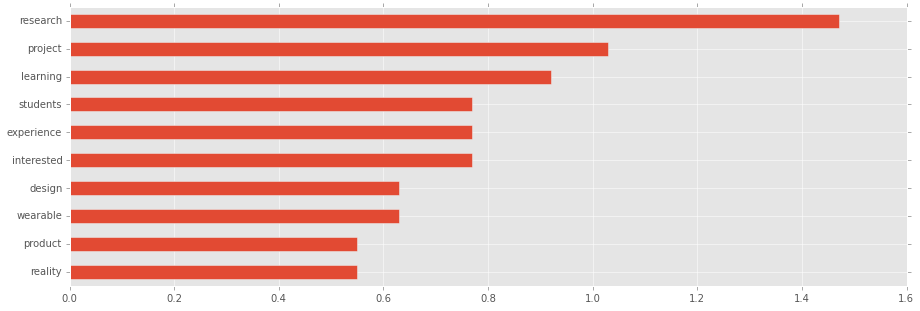

In [81]:
print(totalStats[:30])
totalStats["Per"][:10].plot(kind="barh").invert_yaxis()
plt.savefig("totalWordPer2.svg", format="svg")

             Count   Per
research        35  1.52
project         26  1.13
learning        20  0.87
students        18  0.78
interested      16  0.70
design          15  0.65
wearable        15  0.65
experience      14  0.61
work            14  0.61
product         13  0.56
help            12  0.52
explore         12  0.52
better          11  0.48
application     11  0.48
teaching        11  0.48
data            11  0.48
app             11  0.48
test            11  0.48
development     10  0.43
study           10  0.43


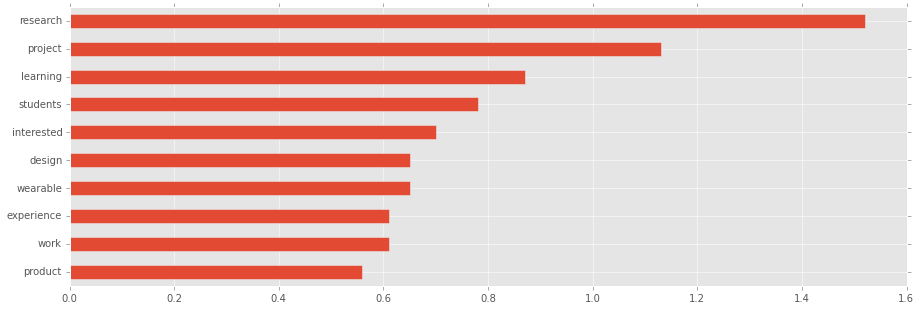

In [79]:
print(glassStats[:20])
glassStats["Per"][:10].plot(kind="barh").invert_yaxis()

             Count   Per
virtual         10  2.42
reality          8  1.94
experience       7  1.69
learning         5  1.21
interested       5  1.21
research         5  1.21
future           4  0.97
gaming           4  0.97
software         4  0.97
vr               4  0.97
purposes         4  0.97
unreal           3  0.73
going            3  0.73
learn            3  0.73
modelling        3  0.73
students         3  0.73
3d               3  0.73
engineering      3  0.73
create           3  0.73
test             3  0.73


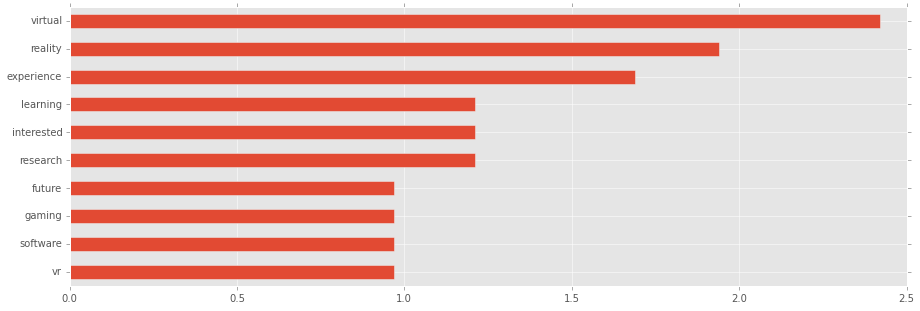

In [80]:
print(riftStats[:20])
riftStats["Per"][:10].plot(kind="barh").invert_yaxis()